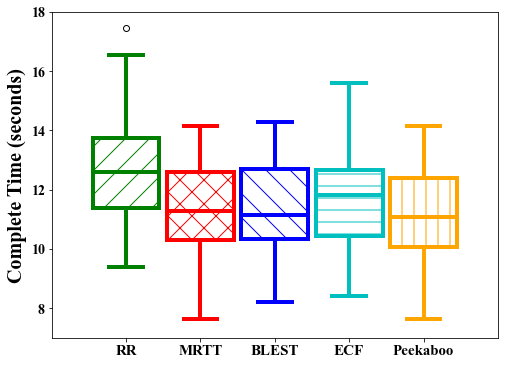

In [31]:
## figure 9a stable completion time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

schedulerTypes = [0,1,2,3,4]

comTime = []

for j in range(1,201):
    if (j==97 or j==188):
        continue
    c_time = []
    for i in schedulerTypes:
        dir = 'scheduler-'+str(j)
        file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        if (int(last_line.split('\t')[3]) > 5000000):
            c_time.append(float(last_line.split('\t')[0]))
        else:
            c_time.append(0)
    comTime.append(c_time)

dataTotal = pd.DataFrame (comTime, columns = ['RR', 'MRTT', 'BLEST', 'ECF', 'PEEK'])

## clean data
toDrop = dataTotal.loc[dataTotal["BLEST"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop = dataTotal.loc[dataTotal["RR"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MRTT"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["ECF"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["PEEK"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)

ct0 = [dataTotal['RR']]
ct1 = [dataTotal['MRTT']]
ct2 = [dataTotal['BLEST']]
ct3 = [dataTotal['ECF']]
ct4 = [dataTotal['PEEK']]

bar_width = 0.9

boxprops = dict(linestyle='-', linewidth=4)
whiskerprops = dict(linestyle='-', linewidth=4)
capprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)

plt.figure(figsize=(8,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0))),widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1*2,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.1*3,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot3['boxes']:
    box.set(hatch = '-', fill=False)
ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.1*4,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot4['boxes']:
    box.set(hatch = '|', fill=False) 


def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    plt.plot([], c=color_code, label=label)
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'green', 'RR')
define_box_properties(ct_plot1, 'red', 'MRTT')
define_box_properties(ct_plot2, 'blue', 'BLEST')
define_box_properties(ct_plot3, 'c', 'ECF')
define_box_properties(ct_plot4, 'orange', 'PEEK')
 
# set the x label values
ticks = ['RR', 'MRTT', 'BLEST', 'ECF', 'Peekaboo']
plt.xticks([0,1,2,3,4], ticks)
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.ylabel("Complete Time (seconds)", fontsize=20, fontweight='bold')

plt.xlim(-1, len(ticks))
plt.ylim(7, 18)

plt.savefig('./comTime_scheduler.pdf', format='pdf')
plt.savefig('./comTime_scheduler.png', format='png')
plt.show()

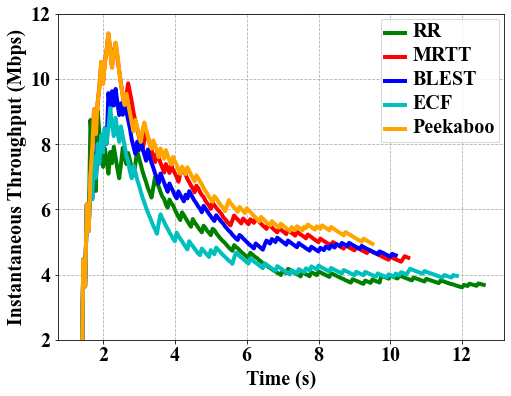

In [32]:
## figure 9b stable instantaneous throughput

def help(i):
    file = open('scheduler-133'+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open('scheduler-133'+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
        if (temp[0] == '3' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal


rr = help(0)  
minrtt = help(1)
blest = help(2)  
ecf = help(3)
peek = help(4)

plt.figure(figsize=(8, 6))
plt.grid(linestyle="--")
ax = plt.gca()

plt.plot(rr['Time'], rr['goodput'], color="green", label="RR", linewidth=4)
plt.plot(minrtt['Time'], minrtt['goodput'], color="red", label="MRTT", linewidth=4)
plt.plot(blest['Time'], blest['goodput'], color="blue", label="BLEST", linewidth=4)
plt.plot(ecf['Time'], ecf['goodput'], color="c", label="ECF", linewidth=4)
plt.plot(peek['Time'], peek['goodput'], color="orange", label="Peekaboo", linewidth=4)

plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.ylabel("Instantaneous Throughput (Mbps)", fontsize=20, fontweight='bold')
plt.xlabel("Time (s)", fontsize=20, fontweight='bold')
plt.ylim(2, 12)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=20, fontweight='bold') 

plt.savefig('./ins_throughput_scheduler.pdf', format='pdf')
plt.savefig('./ins_throughput_scheduler.png', format='png') 
plt.show()


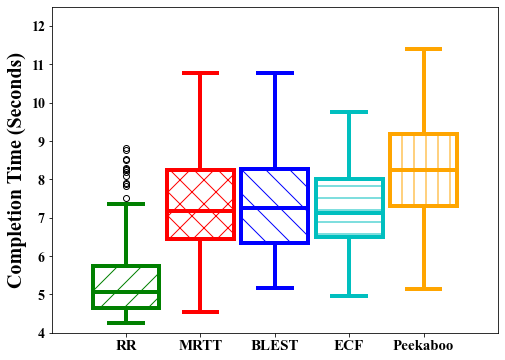

In [33]:
## figure 10a unstable completion time

schedulerTypes = [0,1,2,3,4]

comTime = []

for j in range(1,201):
    if (j==97 or j==188):
        continue
    c_time = []
    for i in schedulerTypes:
        dir = 'schedulerU-'+str(j)
        file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        if (int(last_line.split('\t')[3]) > 5000000):
            c_time.append(float(last_line.split('\t')[0]))
        else:
            c_time.append(0)
    comTime.append(c_time)

dataTotal = pd.DataFrame (comTime, columns = ['RR', 'MRTT', 'BLEST', 'ECF', 'PEEK'])


toDrop = dataTotal.loc[dataTotal["BLEST"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop = dataTotal.loc[dataTotal["RR"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MRTT"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["ECF"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["PEEK"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)


ct0 = [dataTotal['RR']]
ct1 = [dataTotal['MRTT']]
ct2 = [dataTotal['BLEST']]
ct3 = [dataTotal['ECF']]
ct4 = [dataTotal['PEEK']]


bar_width = 0.9


boxprops = dict(linestyle='-', linewidth=4)
whiskerprops = dict(linestyle='-', linewidth=4)
capprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)

plt.figure(figsize=(8,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0))),widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1*2,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.1*3,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot3['boxes']:
    box.set(hatch = '-', fill=False)
ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.1*4,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot4['boxes']:
    box.set(hatch = '|', fill=False) 

    
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)

    plt.plot([], c=color_code, label=label)


# setting colors for each groups
define_box_properties(ct_plot0, 'green', 'RR')
define_box_properties(ct_plot1, 'red', 'MRTT')
define_box_properties(ct_plot2, 'blue', 'BLEST')
define_box_properties(ct_plot3, 'c', 'ECF')
define_box_properties(ct_plot4, 'orange', 'PEEK')
 
# set the x label values
ticks = ['RR', 'MRTT', 'BLEST', 'ECF', 'Peekaboo']
plt.xticks([0,1,2,3,4], ticks)

plt.xticks(fontsize=15, fontweight='bold') 
plt.yticks(fontsize=14, fontweight='bold')
plt.ylabel("Completion Time (Seconds)", fontsize=20, fontweight='bold')

plt.xlim(-1, len(ticks))
plt.ylim(4, 12.5)

plt.savefig('./comTime_scheduler_unstable.pdf', format='pdf')
plt.savefig('./comTime_scheduler_unstable.png', format='png')
plt.show()

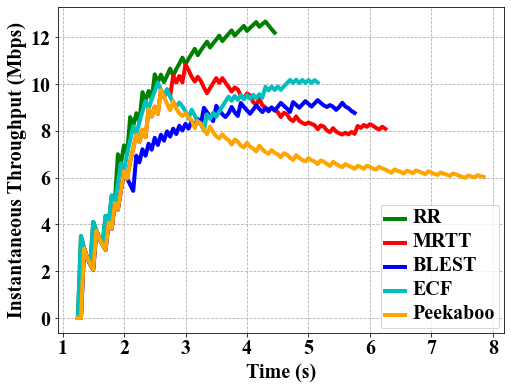

In [34]:
## figure 10b unstable instantaneous throughput

def help(i):
    file = open('schedulerU-79'+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open('schedulerU-79'+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
        if (temp[0] == '3' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal


rr = help(0)  
minrtt = help(1)
blest = help(2)  
ecf = help(3)
peek = help(4)

plt.figure(figsize=(8, 6))
plt.grid(linestyle="--")
ax = plt.gca()

plt.plot(rr['Time'], rr['goodput'], color="green", label="RR", linewidth=4)
plt.plot(minrtt['Time'], minrtt['goodput'], color="red", label="MRTT", linewidth=4)
plt.plot(blest['Time'], blest['goodput'], color="blue", label="BLEST", linewidth=4)
plt.plot(ecf['Time'], ecf['goodput'], color="c", label="ECF", linewidth=4)
plt.plot(peek['Time'], peek['goodput'], color="orange", label="Peekaboo", linewidth=4)


plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

plt.ylabel("Instantaneous Throughput (Mbps)", fontsize=20, fontweight='bold')
plt.xlabel("Time (s)", fontsize=20, fontweight='bold')

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=20, fontweight='bold')

plt.savefig('./ins_throughput_scheduler_unstable.pdf', format='pdf')
plt.savefig('./ins_throughput_scheduler_unstable.png', format='png')
plt.show()